# Lung Cancer

### Data set description
This synthetic dataset includes detailed information on lung cancer patients, such as demographics, medical history, treatment details, and survival outcomes. It closely resembles real-world clinical scenarios, making it useful for predictive modeling, prognosis assessment, and treatment efficacy analysis in lung cancer research.

### Goal
What I hope to discover in the killer graph is what ethnicity lung cancer patients tend to survive the longest (in months).

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv('lung_cancer_data.csv')

data.head()


,Patient_ID,Age,Gender,Smoking_History,Tumor_Size_mm,Tumor_Location,Stage,Treatment,Survival_Months,Ethnicity,...,Alanine_Aminotransferase_Level,Aspartate_Aminotransferase_Level,Creatinine_Level,LDH_Level,Calcium_Level,Phosphorus_Level,Glucose_Level,Potassium_Level,Sodium_Level,Smoking_Pack_Years
0,Patient0000,68,Male,Current Smoker,81.678677,Lower Lobe,Stage III,Surgery,44,Hispanic,...,27.985571,46.801214,1.245849,239.240255,10.366307,3.547734,113.919243,4.968163,139.822861,17.006956
1,Patient0001,58,Male,Never Smoked,78.448272,Lower Lobe,Stage I,Radiation Therapy,101,Caucasian,...,30.120956,39.711531,1.463231,233.515237,10.081731,2.945020,101.321578,3.896795,135.449361,93.270893
2,Patient0002,44,Male,Former Smoker,67.714305,Lower Lobe,Stage I,Chemotherapy,69,African American,...,5.882418,32.640602,0.630109,169.037460,8.660892,4.637399,78.214177,4.369050,143.377155,70.348376
3,Patient0003,72,Male,Current Smoker,70.806008,Lower Lobe,Stage III,Chemotherapy,95,African American,...,38.908154,44.319393,0.594342,213.967590,8.832669,3.617098,127.895361,4.348474,138.586005,19.828128
4,Patient0004,37,Female,Never Smoked,87.272433,Lower Lobe,Stage IV,Radiation Therapy,105,Asian,...,26.344877,15.746906,1.478239,118.187543,9.247609,4.773255,148.801185,3.671976,141.230724,81.047456


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23658 entries, 0 to 23657
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Patient_ID                        23658 non-null  object 
 1   Age                               23658 non-null  int64  
 2   Gender                            23658 non-null  object 
 3   Smoking_History                   23658 non-null  object 
 4   Tumor_Size_mm                     23658 non-null  float64
 5   Tumor_Location                    23658 non-null  object 
 6   Stage                             23658 non-null  object 
 7   Treatment                         23658 non-null  object 
 8   Survival_Months                   23658 non-null  int64  
 9   Ethnicity                         23658 non-null  object 
 10  Insurance_Type                    23658 non-null  object 
 11  Family_History                    23658 non-null  object 
 12  Como

In [3]:
data.shape

(23658, 38)

In [4]:
data.isna().sum()

Patient_ID                          0
Age                                 0
Gender                              0
Smoking_History                     0
Tumor_Size_mm                       0
Tumor_Location                      0
Stage                               0
Treatment                           0
Survival_Months                     0
Ethnicity                           0
Insurance_Type                      0
Family_History                      0
Comorbidity_Diabetes                0
Comorbidity_Hypertension            0
Comorbidity_Heart_Disease           0
Comorbidity_Chronic_Lung_Disease    0
Comorbidity_Kidney_Disease          0
Comorbidity_Autoimmune_Disease      0
Comorbidity_Other                   0
Performance_Status                  0
Blood_Pressure_Systolic             0
Blood_Pressure_Diastolic            0
Blood_Pressure_Pulse                0
Hemoglobin_Level                    0
White_Blood_Cell_Count              0
Platelet_Count                      0
Albumin_Leve

In [5]:
data.describe()

,Age,Tumor_Size_mm,Survival_Months,Performance_Status,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Blood_Pressure_Pulse,Hemoglobin_Level,White_Blood_Cell_Count,Platelet_Count,...,Alanine_Aminotransferase_Level,Aspartate_Aminotransferase_Level,Creatinine_Level,LDH_Level,Calcium_Level,Phosphorus_Level,Glucose_Level,Potassium_Level,Sodium_Level,Smoking_Pack_Years
count,23658.000000,23658.000000,23658.000000,23658.000000,23658.000000,23658.000000,23658.000000,23658.000000,23658.000000,23658.000000,...,23658.000000,23658.000000,23658.000000,23658.000000,23658.000000,23658.000000,23658.000000,23658.000000,23658.000000,23658.000000
mean,54.439344,55.383736,59.863809,1.999915,134.462381,84.475780,79.585299,14.000137,6.735637,299.867482,...,22.504677,30.133226,0.999459,174.734575,9.261114,3.742771,109.895553,4.245646,140.028215,49.913594
std,14.396386,26.004354,34.246042,1.413675,26.020492,14.409826,11.546690,2.301411,1.879292,86.897568,...,10.047864,11.560915,0.287517,43.230997,0.719875,0.721708,23.109136,0.431968,2.894568,28.870940
min,30.000000,10.004279,1.000000,0.000000,90.000000,60.000000,60.000000,10.000070,3.501213,150.017892,...,5.001090,10.000860,0.500001,100.002721,8.000018,2.500069,70.000420,3.500034,135.000934,0.016800
25%,42.000000,32.972797,30.000000,1.000000,112.000000,72.000000,70.000000,11.990625,5.108723,224.884576,...,13.816180,20.065339,0.748845,137.444977,8.640877,3.120107,89.828616,3.871842,137.540078,25.026793
50%,54.000000,55.296297,60.000000,2.000000,134.000000,85.000000,80.000000,13.983383,6.729774,299.933443,...,22.547943,30.271772,1.001183,174.390634,9.259304,3.730837,109.949488,4.242236,140.002209,49.926220
75%,67.000000,78.190014,89.000000,3.000000,157.000000,97.000000,90.000000,15.999260,8.353701,375.437029,...,31.092935,40.107488,1.249173,212.228273,9.883248,4.364422,130.061977,4.618318,142.541883,74.924580
max,79.000000,99.990554,119.000000,4.000000,179.000000,109.000000,99.000000,17.999957,9.999535,449.974734,...,39.999543,49.998571,1.499998,249.996391,10.499913,4.999974,149.997056,4.999954,144.999869,99.999493


In [6]:
data.drop(['Patient_ID'], axis=1, inplace=True)
data.head()

,Age,Gender,Smoking_History,Tumor_Size_mm,Tumor_Location,Stage,Treatment,Survival_Months,Ethnicity,Insurance_Type,...,Alanine_Aminotransferase_Level,Aspartate_Aminotransferase_Level,Creatinine_Level,LDH_Level,Calcium_Level,Phosphorus_Level,Glucose_Level,Potassium_Level,Sodium_Level,Smoking_Pack_Years
0,68,Male,Current Smoker,81.678677,Lower Lobe,Stage III,Surgery,44,Hispanic,Medicare,...,27.985571,46.801214,1.245849,239.240255,10.366307,3.547734,113.919243,4.968163,139.822861,17.006956
1,58,Male,Never Smoked,78.448272,Lower Lobe,Stage I,Radiation Therapy,101,Caucasian,Private,...,30.120956,39.711531,1.463231,233.515237,10.081731,2.945020,101.321578,3.896795,135.449361,93.270893
2,44,Male,Former Smoker,67.714305,Lower Lobe,Stage I,Chemotherapy,69,African American,Other,...,5.882418,32.640602,0.630109,169.037460,8.660892,4.637399,78.214177,4.369050,143.377155,70.348376
3,72,Male,Current Smoker,70.806008,Lower Lobe,Stage III,Chemotherapy,95,African American,Medicare,...,38.908154,44.319393,0.594342,213.967590,8.832669,3.617098,127.895361,4.348474,138.586005,19.828128
4,37,Female,Never Smoked,87.272433,Lower Lobe,Stage IV,Radiation Therapy,105,Asian,Medicaid,...,26.344877,15.746906,1.478239,118.187543,9.247609,4.773255,148.801185,3.671976,141.230724,81.047456


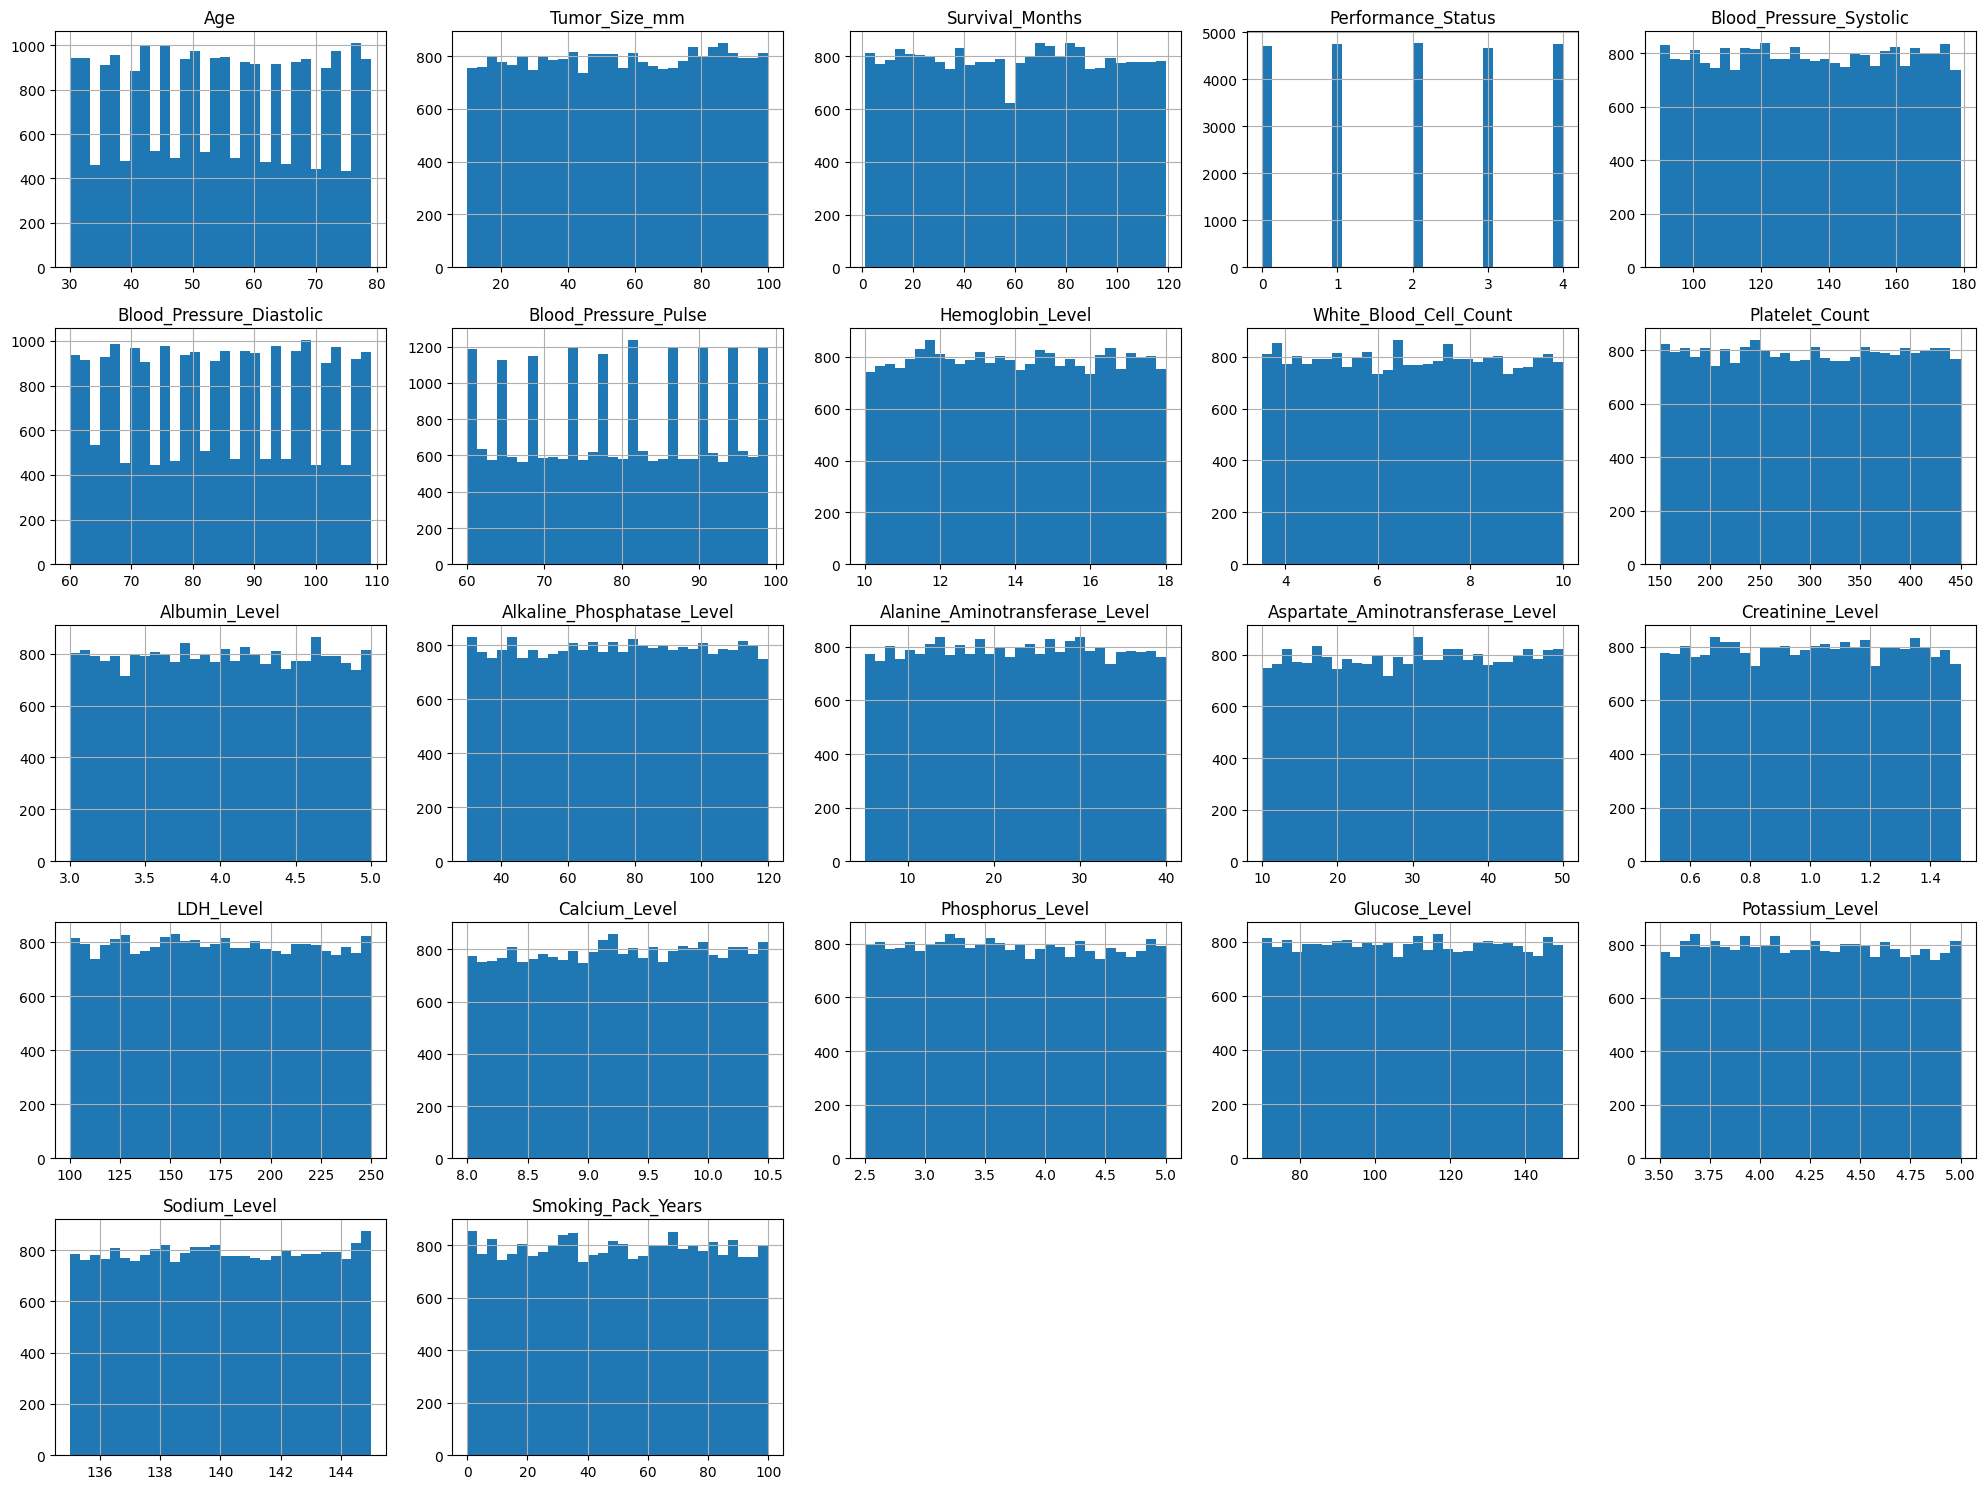

In [7]:
data.hist(bins=30, figsize=(20, 15))
plt.tight_layout()
plt.show()

<Axes: xlabel='Stage', ylabel='Count'>

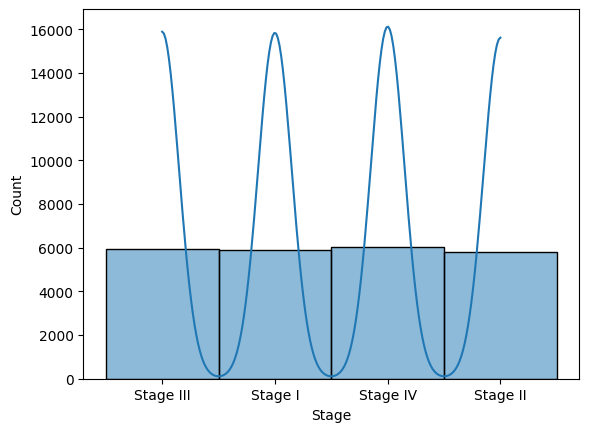

In [8]:
sns.histplot(data['Stage'], kde=True)

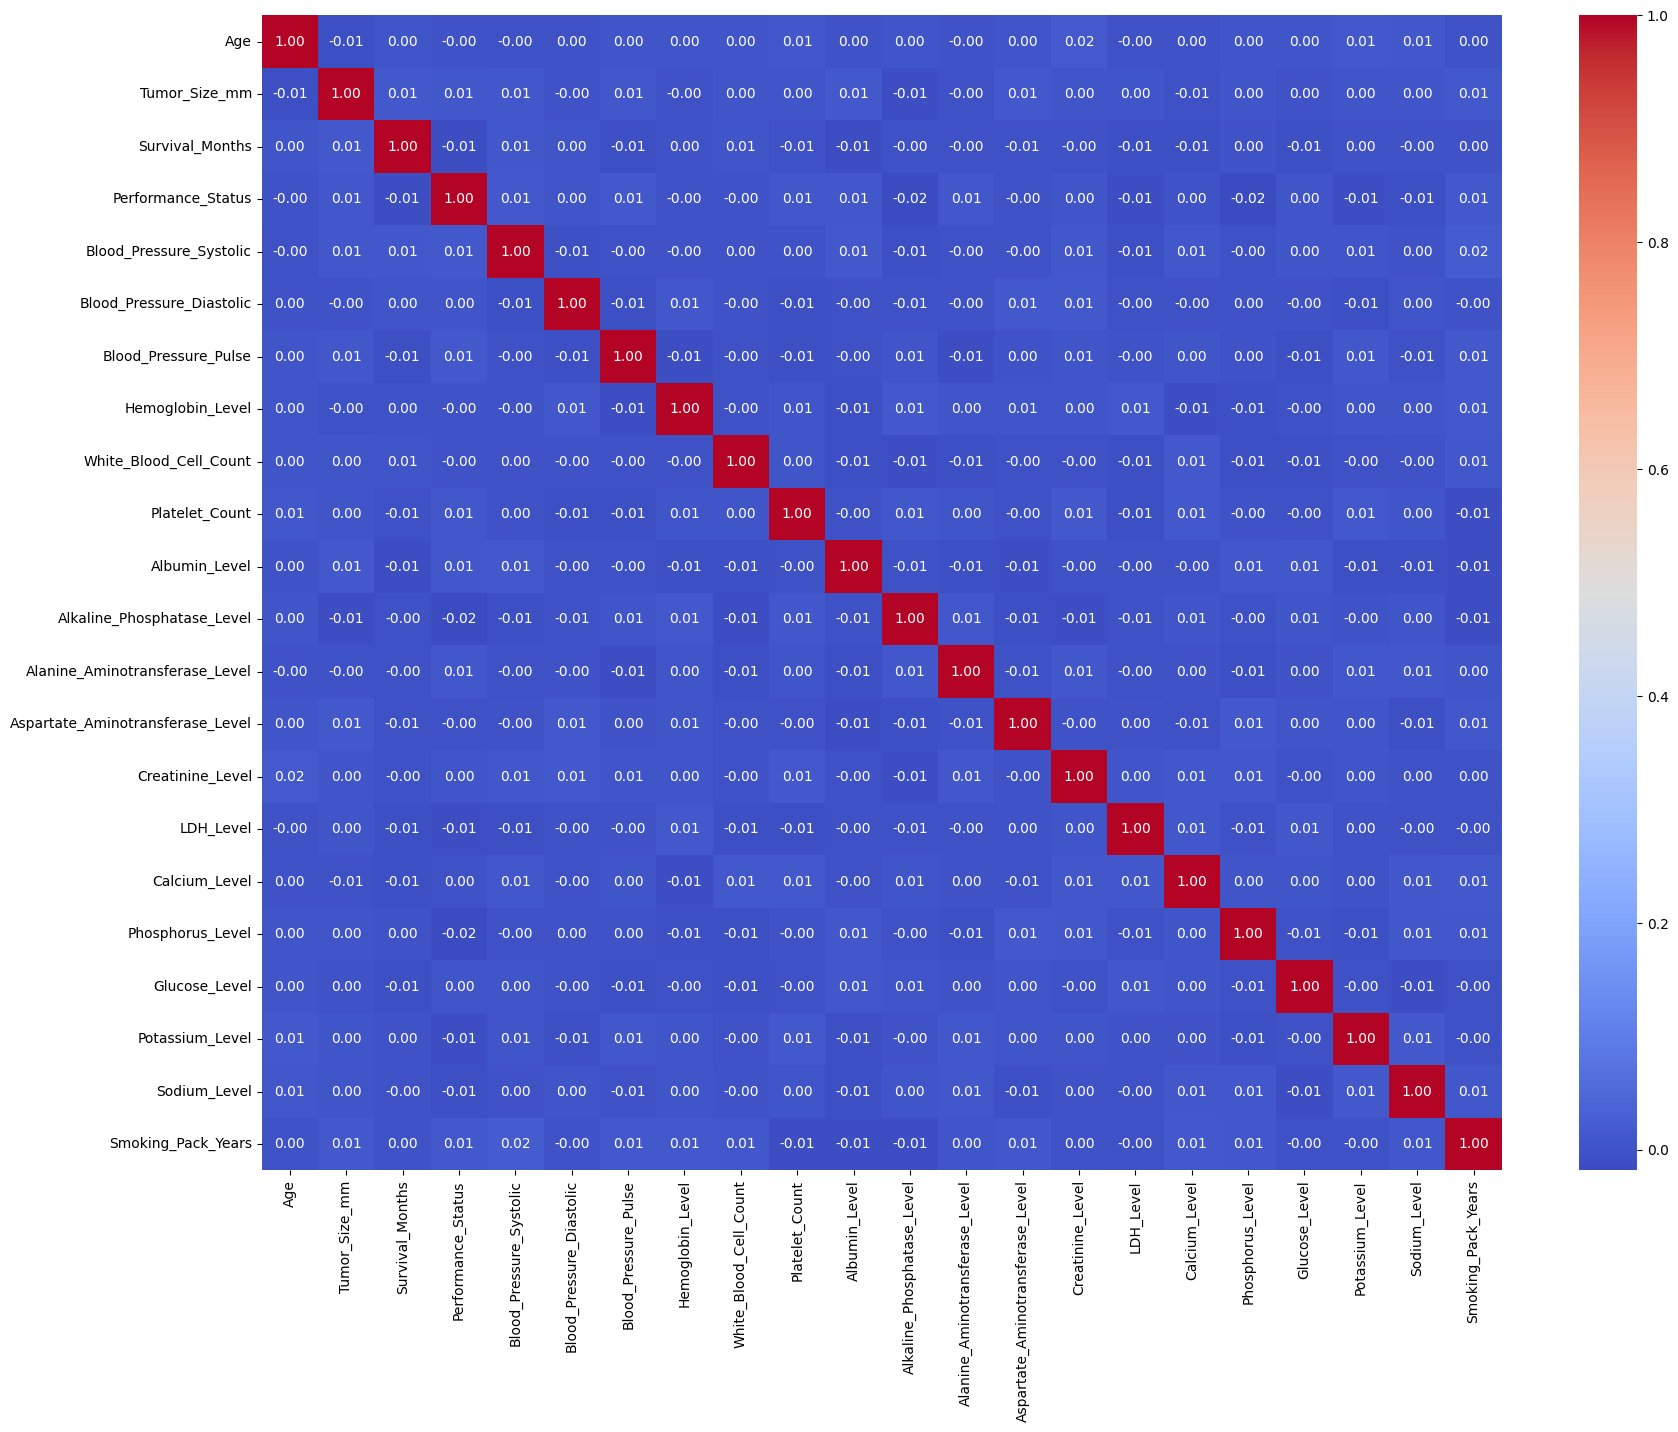

In [9]:
correlation_matrix = data.select_dtypes(include=['float64', 'int64']).corr()

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [10]:
objects = data.select_dtypes(include=["object"])
objects_col = list(objects.columns)
objects_col.remove('Stage')


data = pd.get_dummies(data, columns = objects_col)
data = data.map(lambda x: int(x) if isinstance(x, bool) else x)
data

,Age,Tumor_Size_mm,Stage,Survival_Months,Performance_Status,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Blood_Pressure_Pulse,Hemoglobin_Level,White_Blood_Cell_Count,...,Comorbidity_Heart_Disease_No,Comorbidity_Heart_Disease_Yes,Comorbidity_Chronic_Lung_Disease_No,Comorbidity_Chronic_Lung_Disease_Yes,Comorbidity_Kidney_Disease_No,Comorbidity_Kidney_Disease_Yes,Comorbidity_Autoimmune_Disease_No,Comorbidity_Autoimmune_Disease_Yes,Comorbidity_Other_No,Comorbidity_Other_Yes
0,68,81.678677,Stage III,44,3,161,99,92,13.538000,9.800707,...,0,1,1,0,0,1,0,1,0,1
1,58,78.448272,Stage I,101,4,101,91,93,16.800312,4.378428,...,1,0,1,0,0,1,0,1,1,0
2,44,67.714305,Stage I,69,0,109,74,81,14.473493,6.157792,...,1,0,0,1,0,1,1,0,1,0
3,72,70.806008,Stage III,95,1,103,85,68,17.442063,6.259383,...,0,1,1,0,0,1,0,1,1,0
4,37,87.272433,Stage IV,105,0,165,69,99,13.545171,5.203516,...,0,1,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23653,45,91.279410,Stage I,16,3,136,65,60,10.291070,5.424876,...,1,0,1,0,1,0,0,1,1,0
23654,31,45.139048,Stage IV,81,4,157,102,83,14.017448,8.688169,...,1,0,1,0,0,1,1,0,0,1
23655,74,89.640323,Stage IV,52,0,122,96,74,16.195201,3.903498,...,0,1,1,0,0,1,0,1,1,0
23656,47,45.770358,Stage I,26,2,156,102,97,14.111498,9.096301,...,1,0,1,0,1,0,0,1,0,1
